# Introduction to Natural-Language-Processing

In [11]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir, compare_historys

In [365]:
import pandas as pd
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

In [13]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [14]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [15]:
for i in range(5):
    print(train_df['text'][i])

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
Forest fire near La Ronge Sask. Canada
All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
13,000 people receive #wildfires evacuation orders in California 
Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 


In [16]:
count = 0
for i in range(len(train_df['text'])):
    if train_df['target'][i] == 0:
        print(train_df['text'][i])
        count += 1
    if count > 4:
        break

What's up man?
I love fruits
Summer is lovely
My car is so fast
What a goooooooaaaaaal!!!!!!


In [17]:
train_df.target.value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [18]:
len(train_df), len(test_df)

(7613, 3263)

In [19]:
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [20]:
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[['text', 'target']][random_index:random_index+5].itertuples():
    _, text, target = row
    print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
    print(f"Text:\n{text}\n")
    print("---\n")

Target: 0 (not real disaster)
Text:
(OFFICIAL VID) &gt; #DoubleCups &gt;&gt; https://t.co/lfKMTZaEkk &gt;&gt; @TrubGME Prod @THISIZBWRIGHT &gt;&gt; #ARMAGEDDON                 .

---

Target: 0 (not real disaster)
Text:
Be annihilated for status education mba on behalf of a on easy street careen: eOvm http://t.co/e0pI0c54FF

---

Target: 1 (real disaster)
Text:
@Truly_Stings Yo Dm me

---

Target: 0 (not real disaster)
Text:
#KCA #VoteJKT48ID DUCKVILLELOL: Burning flips the table and says 'screw this lets hit some buildings!' Grabs a DR Û_ http://t.co/03L7NwQDje

---

Target: 1 (real disaster)
Text:
?#FUKUSHIMA?#TEPCO?
Mountains of debris from the Japanese tsunami have floated to the West Coast
http://t.co/y518jYrZav

---



In [21]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [22]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

## Text vectorization (tokenization)

In [23]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
 
max_vocab_length = 10000
max_length = 15
 
text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None, 
                                    output_mode="int", 
                                    output_sequence_length=max_length, 
                                    pad_to_max_tokens=True)

In [24]:
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [25]:
text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int", 
                                    output_sequence_length=max_length)

In [26]:
text_vectorizer.adapt(train_sentences)

In [27]:
# tokenize a sample sentence
sample_sentence = "there's a flood in my street"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]], dtype=int64)>

In [28]:
# tokenize random sentence
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
When bae soak you in mudslide at backroom???? #thisiswhywecanthavenicethings http://t.co/kgxNwzIUxd      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  45,    1, 4588,   12,    4,  456,   17,    1, 4426,    1,    0,
           0,    0,    0,    0]], dtype=int64)>

In [29]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


## Creating an Embedding layer

In [30]:
from tensorflow.keras.layers import Embedding

embedding = Embedding(input_dim=max_vocab_length,
                      output_dim=128,
                      input_length=max_length)

embedding

In [31]:
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
Islamic State claims suicide bombing at Saudi Arabian mosque: Ten members of emergency service... http://t.co/mpOaEFQl6k via @josephjett      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 4.3670509e-02, -3.0868538e-03, -4.0889014e-02, ...,
          6.8666786e-04, -5.6857355e-03,  3.7903238e-02],
        [-4.3002833e-02, -1.4087189e-02,  6.1765313e-06, ...,
          1.8792998e-02,  2.2570003e-02, -3.1424761e-03],
        [ 2.0401526e-02,  4.4217888e-02,  1.0533202e-02, ...,
          2.9162910e-02,  4.7274102e-02, -4.8522998e-02],
        ...,
        [ 2.9482510e-02,  2.2282269e-02, -2.9554391e-02, ...,
          4.1148175e-02, -2.0562196e-02,  1.3971832e-02],
        [-3.7512459e-02,  3.4696106e-02,  3.7446771e-02, ...,
         -3.6577273e-02,  4.8477639e-02,  3.2023583e-02],
        [ 1.4202129e-02, -2.1625340e-02,  4.9643446e-02, ...,
          2.1561194e-02, -3.0340422e-02, -4.2540219e-02]]], dtype=float32)>

In [32]:
sample_embed[0], sample_embed[0].shape, random_sentence

(<tf.Tensor: shape=(15, 128), dtype=float32, numpy=
 array([[ 4.3670509e-02, -3.0868538e-03, -4.0889014e-02, ...,
          6.8666786e-04, -5.6857355e-03,  3.7903238e-02],
        [-4.3002833e-02, -1.4087189e-02,  6.1765313e-06, ...,
          1.8792998e-02,  2.2570003e-02, -3.1424761e-03],
        [ 2.0401526e-02,  4.4217888e-02,  1.0533202e-02, ...,
          2.9162910e-02,  4.7274102e-02, -4.8522998e-02],
        ...,
        [ 2.9482510e-02,  2.2282269e-02, -2.9554391e-02, ...,
          4.1148175e-02, -2.0562196e-02,  1.3971832e-02],
        [-3.7512459e-02,  3.4696106e-02,  3.7446771e-02, ...,
         -3.6577273e-02,  4.8477639e-02,  3.2023583e-02],
        [ 1.4202129e-02, -2.1625340e-02,  4.9643446e-02, ...,
          2.1561194e-02, -3.0340422e-02, -4.2540219e-02]], dtype=float32)>,
 TensorShape([15, 128]),
 'Islamic State claims suicide bombing at Saudi Arabian mosque: Ten members of emergency service... http://t.co/mpOaEFQl6k via @josephjett')

## Modelling a text datasetning data

* Model 0: Naive Bayes (baseline)
* Model 1: Feed-forward neural network (dense model)
* Model 2: LSTM model
* Model 3: GRU model
* Model 4: Bidirectional-LSTM model
* Model 5: 1D Convolutional Neural Network
* Model 6: TensorFlow Hub Pretrained Feature Extractor
* Model 7: Same as model 6 with 10% of training data

> CREATE

> BUILD

> FIT

> EVALUTE

### Model 0 : Naive Bayes (baseline)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB()),
])

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [34]:
# evaluate the model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Baseline model Accuracy: {baseline_score*100:.2f}%")

Baseline model Accuracy: 79.27%


In [35]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [267]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_preds):
    # accuracy
    model_accuracy = accuracy_score(y_true, y_preds)
    # Calculate model precision, recall and f1 score using "weighted" average
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_preds, average="weighted")
    model_results = {"accuracy": model_accuracy,
                     "precision": model_precision,
                     "recall": model_recall,
                     "f1": model_f1}
    return model_results

In [268]:
# get baseline results
baseline_results = calculate_results(val_labels, baseline_preds)
baseline_results

{'accuracy': 0.7926509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 1 : Feed-forward neural network (dense model)

In [38]:
from helper_functions import create_tensorboard_callback

SAVE_DIR = 'model_logs'

In [39]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [40]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_avg_pool_layer (Glob  (None, 128)              0         
 alAveragePooling1D)                                             
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [41]:
# compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=tf.keras.metrics.Accuracy())

In [42]:
# fit the model
model_1_history = model_1.fit(x=train_sentences,
                              y=train_labels,
                              epochs=100,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20241009-113914
Epoch 1/100
215/215 [==============================] - 3s 11ms/step - loss: 0.6099 - accuracy: 0.0000e+00 - val_loss: 0.5370 - val_accuracy: 0.0000e+00
Epoch 2/100
215/215 [==============================] - 3s 12ms/step - loss: 0.4401 - accuracy: 0.0000e+00 - val_loss: 0.4711 - val_accuracy: 0.0000e+00
Epoch 3/100
215/215 [==============================] - 3s 14ms/step - loss: 0.3459 - accuracy: 0.0000e+00 - val_loss: 0.4602 - val_accuracy: 0.0000e+00
Epoch 4/100
215/215 [==============================] - 3s 13ms/step - loss: 0.2848 - accuracy: 0.0000e+00 - val_loss: 0.4629 - val_accuracy: 0.0000e+00
Epoch 5/100
215/215 [==============================] - 3s 12ms/step - loss: 0.2382 - accuracy: 0.0000e+00 - val_loss: 0.4824 - val_accuracy: 0.0000e+00
Epoch 6/100
215/215 [==============================] - 3s 13ms/step - loss: 0.2022 - accuracy: 0.0000e+00 - val_loss: 0.5008 - val_accuracy: 0.0000e+00
Epoch 7/100
21

In [43]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 2ms/step - loss: 1.9465 - accuracy: 0.1010


[1.9464911222457886, 0.10104987025260925]

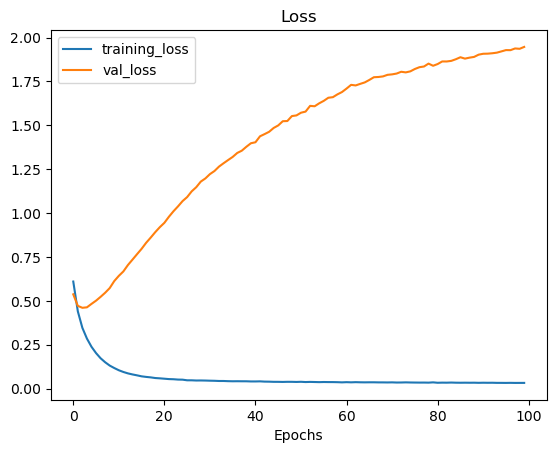

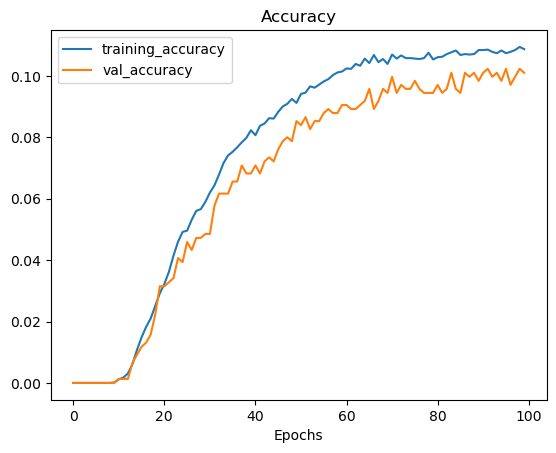

In [44]:
plot_loss_curves(model_1_history)

In [45]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[8.0400616e-01],
       [8.0326527e-01],
       [9.9994069e-01],
       [8.3174539e-01],
       [2.8314306e-09],
       [9.9047011e-01],
       [5.7331616e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9639297e-01]], dtype=float32)

In [46]:
model_1_pred_probs.shape

(762, 1)

In [47]:
model_1_pred_probs[0]

array([0.80400616], dtype=float32)

In [48]:
val_labels[0]

0

In [49]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[0]

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [269]:
model_1_results = calculate_results(y_true=val_labels,
                                    y_preds=model_1_preds)
model_1_results

{'accuracy': 0.7375328083989501,
 'precision': 0.737155827364345,
 'recall': 0.7375328083989501,
 'f1': 0.7372626602380166}

In [51]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

In [52]:
# Visualizing learned embeddings
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [53]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_avg_pool_layer (Glob  (None, 128)              0         
 alAveragePooling1D)                                             
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [54]:
embed_weights = model_1.get_layer("embedding").get_weights()[0]
embed_weights

array([[ 4.5366909e-02, -9.1478573e-03, -1.0339256e-02, ...,
        -7.8799480e-05, -8.8918739e-04,  6.7939073e-02],
       [-1.2702604e-02, -4.5970377e-02,  2.1570677e-02, ...,
         4.5653179e-02, -5.3959968e-03, -6.8786941e-02],
       [-6.5549421e-03,  3.9156459e-02,  2.7864400e-02, ...,
        -3.8909756e-02, -4.3373741e-02,  3.8691528e-02],
       ...,
       [ 1.3803467e-03,  2.3572635e-02, -3.7183464e-02, ...,
         2.0011552e-03, -6.9665797e-03, -4.6302523e-02],
       [ 8.2458489e-02,  7.3740564e-02,  4.3514375e-02, ...,
        -6.3029014e-02, -4.6179809e-02,  5.1693637e-02],
       [ 6.8419653e-01,  7.1296865e-01,  7.0889461e-01, ...,
        -7.2238517e-01, -7.3445833e-01,  7.1530414e-01]], dtype=float32)

In [55]:
embed_weights.shape

(10000, 128)

In [56]:
import io

# Create output writers
out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# Write embedding vectors and words to file
for num, word in enumerate(words_in_vocab):
  if num == 0: 
     continue # skip padding token
  vec = embed_weights[num]
  out_m.write(word + "\n") # write words to file
  out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
out_v.close()
out_m.close()

### Model 2: LSTM model

```
Input (text) -> Tokenize -> Embedding -> Layers (RNN/dense) -> Output (probability)
```

In [57]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64)(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs, name='model_2_LSTM')

In [58]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                      

In [59]:
# compile the code
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=tf.keras.metrics.Accuracy())

In [60]:
# fit the model
model_2_history = model_2.fit(train_sentences, train_labels,
                              epochs=100,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                      "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20241009-114347
Epoch 1/100
215/215 [==============================] - 10s 29ms/step - loss: 0.0901 - accuracy: 0.0000e+00 - val_loss: 1.2667 - val_accuracy: 0.0000e+00
Epoch 2/100
215/215 [==============================] - 5s 24ms/step - loss: 0.0356 - accuracy: 0.0000e+00 - val_loss: 1.6999 - val_accuracy: 0.0000e+00
Epoch 3/100
215/215 [==============================] - 6s 30ms/step - loss: 0.0345 - accuracy: 0.0000e+00 - val_loss: 1.5516 - val_accuracy: 0.0000e+00
Epoch 4/100
215/215 [==============================] - 7s 32ms/step - loss: 0.0397 - accuracy: 0.0000e+00 - val_loss: 1.6601 - val_accuracy: 0.0000e+00
Epoch 5/100
215/215 [==============================] - 7s 33ms/step - loss: 0.0328 - accuracy: 0.0000e+00 - val_loss: 1.8811 - val_accuracy: 0.0000e+00
Epoch 6/100
215/215 [==============================] - 7s 33ms/step - loss: 0.0300 - accuracy: 0.0000e+00 - val_loss: 2.1315 - val_accuracy: 0.0000e+00
Epoch 7/100
21

In [61]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 3s 12ms/step


array([[4.3578777e-03],
       [9.9890196e-01],
       [9.9987888e-01],
       [9.8799026e-01],
       [4.9758523e-06],
       [9.9993747e-01],
       [9.4419080e-01],
       [9.9997997e-01],
       [9.9999410e-01],
       [9.9972647e-01]], dtype=float32)

In [62]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [270]:
# calculate the result
model_2_results = calculate_results(y_true=val_labels, y_preds=model_2_preds)
model_2_results

{'accuracy': 0.7454068241469817,
 'precision': 0.7449037620297463,
 'recall': 0.7454068241469817,
 'f1': 0.744735706756294}

In [271]:
baseline_results

{'accuracy': 0.7926509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

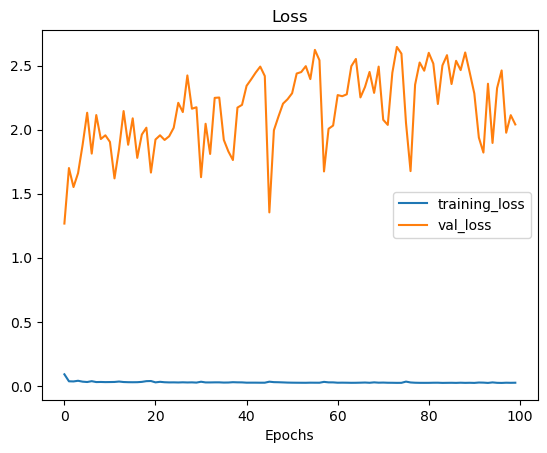

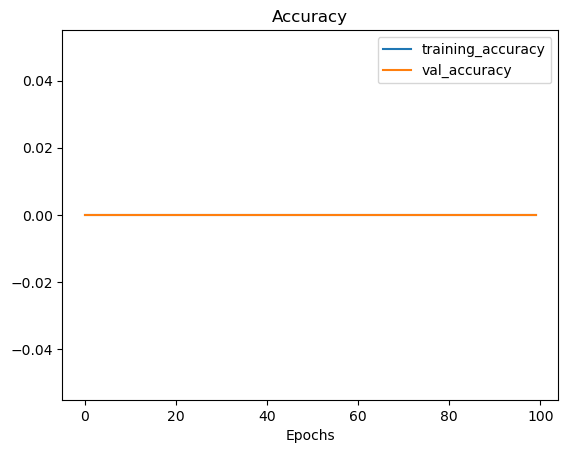

In [65]:
plot_loss_curves(model_2_history)

## Model 3: GRU model

In [66]:
# build the network
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64, return_sequences=True)(x)
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.GRU(64)(x)
x = layers.Dense(64, activation='relu')(x)
# x = layers.GlobalAveragePooling1D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_3 =  tf.keras.Model(inputs, outputs, name='model_3_GRU')

In [67]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 15, 64)            37248     
                                                                 
 lstm_2 (LSTM)               (None, 15, 64)            33024     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                       

In [68]:
# compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=tf.keras.metrics.Accuracy())

In [69]:
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=100,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 'model_3_GRU')])

Saving TensorBoard log files to: model_logs/model_3_GRU/20241009-115636
Epoch 1/100
215/215 [==============================] - 23s 64ms/step - loss: 0.0864 - accuracy: 0.0000e+00 - val_loss: 1.5015 - val_accuracy: 0.0000e+00
Epoch 2/100
215/215 [==============================] - 11s 50ms/step - loss: 0.0382 - accuracy: 0.0000e+00 - val_loss: 1.6228 - val_accuracy: 0.0000e+00
Epoch 3/100
215/215 [==============================] - 12s 55ms/step - loss: 0.0326 - accuracy: 0.0000e+00 - val_loss: 1.7115 - val_accuracy: 0.0000e+00
Epoch 4/100
215/215 [==============================] - 14s 66ms/step - loss: 0.0323 - accuracy: 0.0000e+00 - val_loss: 1.9370 - val_accuracy: 0.0000e+00
Epoch 5/100
215/215 [==============================] - 12s 58ms/step - loss: 0.0309 - accuracy: 0.0000e+00 - val_loss: 1.6003 - val_accuracy: 0.0000e+00
Epoch 6/100
215/215 [==============================] - 10s 45ms/step - loss: 0.0342 - accuracy: 0.0000e+00 - val_loss: 1.3348 - val_accuracy: 0.0000e+00
Epoch 7/10

In [70]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 15, 64)            37248     
                                                                 
 lstm_2 (LSTM)               (None, 15, 64)            33024     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                       

In [71]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 2s 11ms/step


array([[8.4921239e-06],
       [9.9806678e-01],
       [9.9997681e-01],
       [4.2239720e-01],
       [2.9068328e-06],
       [9.9996954e-01],
       [9.9316669e-01],
       [9.9998099e-01],
       [9.9998564e-01],
       [9.9994528e-01]], dtype=float32)

In [72]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [272]:
# calculate the result
model_3_results = calculate_results(y_true=val_labels, y_preds=model_3_preds)
model_3_results

{'accuracy': 0.7493438320209974,
 'precision': 0.7489845053528059,
 'recall': 0.7493438320209974,
 'f1': 0.7483475363447356}

In [273]:
model_2_results

{'accuracy': 0.7454068241469817,
 'precision': 0.7449037620297463,
 'recall': 0.7454068241469817,
 'f1': 0.744735706756294}

In [274]:
baseline_results

{'accuracy': 0.7926509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

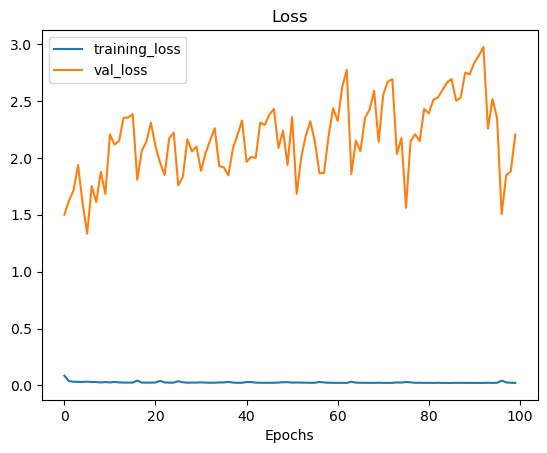

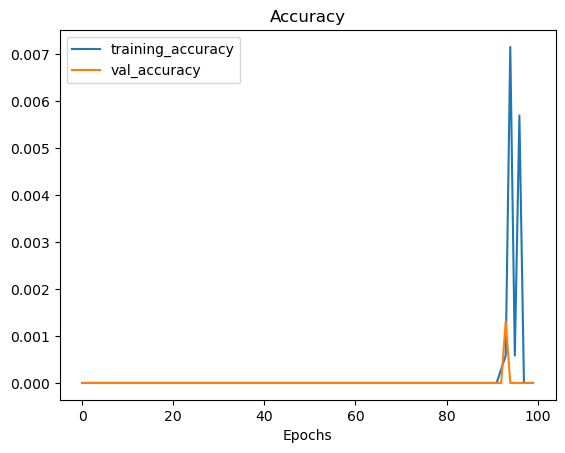

In [76]:
plot_loss_curves(model_3_history)

## Model 4: Bidirectional-LSTM model

In [77]:
# build the network
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.GRU(64))(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_4 =  tf.keras.Model(inputs, outputs, name='model_4_Bidirectional')

In [78]:
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 15, 128)          98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              74496     
 nal)                                                            
                                             

In [79]:
# compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=tf.keras.metrics.Accuracy())

In [80]:
model_4_history = model_4.fit(train_sentences, train_labels,
                              epochs=100,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20241009-121457
Epoch 1/100
215/215 [==============================] - 21s 64ms/step - loss: 0.0607 - accuracy: 0.0000e+00 - val_loss: 1.2620 - val_accuracy: 0.0000e+00
Epoch 2/100
215/215 [==============================] - 14s 65ms/step - loss: 0.0330 - accuracy: 0.0000e+00 - val_loss: 1.4556 - val_accuracy: 0.0000e+00
Epoch 3/100
215/215 [==============================] - 14s 66ms/step - loss: 0.0314 - accuracy: 0.0000e+00 - val_loss: 1.6521 - val_accuracy: 0.0000e+00
Epoch 4/100
215/215 [==============================] - 12s 56ms/step - loss: 0.0282 - accuracy: 0.0000e+00 - val_loss: 1.7639 - val_accuracy: 0.0000e+00
Epoch 5/100
215/215 [==============================] - 12s 54ms/step - loss: 0.0264 - accuracy: 0.0000e+00 - val_loss: 1.9098 - val_accuracy: 0.0000e+00
Epoch 6/100
215/215 [==============================] - 12s 58ms/step - loss: 0.0285 - accuracy: 0.0000e+00 - val_loss: 1.6310 - val_accuracy: 0.0000e+00


In [81]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 3s 10ms/step


array([[1.6874429e-04],
       [9.9905574e-01],
       [9.9998134e-01],
       [2.5131175e-01],
       [1.5177270e-05],
       [9.9999255e-01],
       [9.9994075e-01],
       [9.9999541e-01],
       [9.9999553e-01],
       [9.9995095e-01]], dtype=float32)

In [247]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [275]:
# calculate the result
model_4_results = calculate_results(y_true=val_labels, y_preds=model_4_preds)
model_4_results

{'accuracy': 0.7401574803149606,
 'precision': 0.7398663706047454,
 'recall': 0.7401574803149606,
 'f1': 0.7388478727061404}

In [276]:
model_3_results

{'accuracy': 0.7493438320209974,
 'precision': 0.7489845053528059,
 'recall': 0.7493438320209974,
 'f1': 0.7483475363447356}

In [277]:
baseline_results

{'accuracy': 0.7926509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

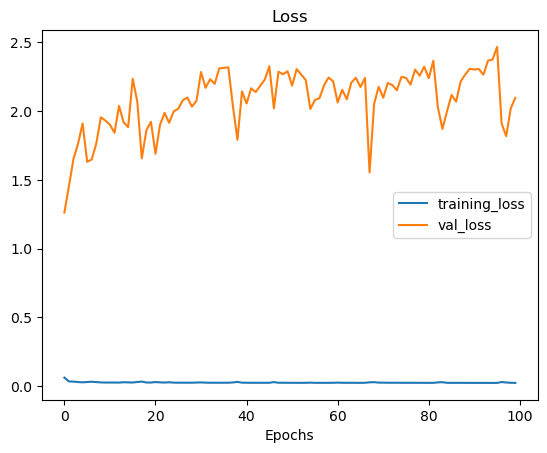

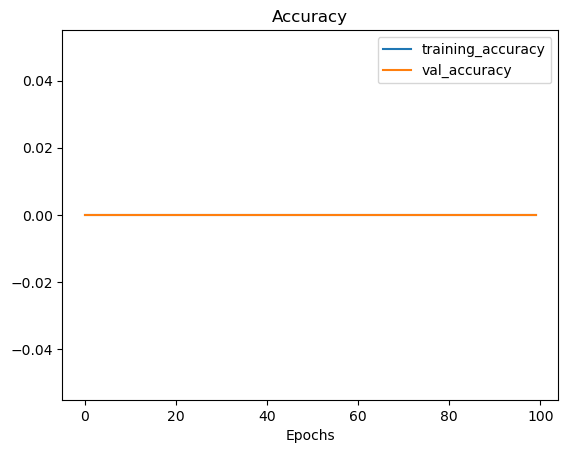

In [86]:
plot_loss_curves(model_4_history)

## Model 5: 1D Convolutional Neural Network

```
Inputs (text) -> Tokenization -> Embedding -> Layers (Conv1D + pooling) -> Output (class probabilities)
```

In [87]:
from tensorflow.keras import layers
embedding_test = embedding(text_vectorizer(['this is a test sentence']))
conv_1d = layers.Conv1D(filters=64,
                        kernel_size=5,
                        activation='relu',
                        padding='valid')
conv_1d_output = conv_1d(embedding_test)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 64]), TensorShape([1, 64]))

In [88]:
embedding_test

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.00104748,  0.11346111,  0.10116834, ..., -0.14462084,
         -0.10534792,  0.51901484],
        [ 0.15138882, -0.05944546,  0.09011593, ..., -0.14692728,
         -0.04322229,  0.05599121],
        [ 0.13418224,  0.07159518,  0.2558152 , ..., -0.25235805,
         -0.04375201,  0.2562891 ],
        ...,
        [ 0.19578104,  0.07250728,  0.02985675, ...,  0.01860385,
         -0.03494338,  0.05788944],
        [ 0.19578104,  0.07250728,  0.02985675, ...,  0.01860385,
         -0.03494338,  0.05788944],
        [ 0.19578104,  0.07250728,  0.02985675, ...,  0.01860385,
         -0.03494338,  0.05788944]]], dtype=float32)>

In [89]:
conv_1d_output

<tf.Tensor: shape=(1, 11, 64), dtype=float32, numpy=
array([[[0.        , 0.21623911, 0.23643033, 0.08157445, 0.        ,
         0.04396806, 0.00878996, 0.210986  , 0.        , 0.        ,
         0.08989092, 0.        , 0.        , 0.01532041, 0.        ,
         0.        , 0.13907279, 0.        , 0.        , 0.        ,
         0.2243724 , 0.37370715, 0.01831409, 0.        , 0.07706487,
         0.02711323, 0.01392895, 0.        , 0.08453678, 0.5252863 ,
         0.30926412, 0.10337538, 0.        , 0.        , 0.12766227,
         0.15904868, 0.        , 0.        , 0.17610577, 0.        ,
         0.18523934, 0.04310884, 0.        , 0.        , 0.        ,
         0.        , 0.06973126, 0.        , 0.10607337, 0.137635  ,
         0.        , 0.        , 0.        , 0.        , 0.23597486,
         0.31082287, 0.        , 0.04350088, 0.16116449, 0.        ,
         0.17739177, 0.08901282, 0.        , 0.        ],
        [0.04053767, 0.05747914, 0.        , 0.17984688, 0.  

In [90]:
max_pool_output

<tf.Tensor: shape=(1, 64), dtype=float32, numpy=
array([[0.2503209 , 0.21623911, 0.23643033, 0.17984688, 0.04813311,
        0.04396806, 0.11787444, 0.210986  , 0.04049399, 0.4828346 ,
        0.2527713 , 0.15588686, 0.14874734, 0.27870288, 0.04477904,
        0.11369485, 0.19939338, 0.        , 0.31597757, 0.34526834,
        0.26461592, 0.37370715, 0.25769928, 0.02612075, 0.18651249,
        0.1534383 , 0.0750471 , 0.18624316, 0.08886445, 0.5252863 ,
        0.30926412, 0.10492153, 0.1742887 , 0.00836047, 0.12766227,
        0.15904868, 0.16536717, 0.22270915, 0.2921074 , 0.19398192,
        0.34389114, 0.46580607, 0.08009094, 0.33957094, 0.16505502,
        0.22994626, 0.06973126, 0.23789074, 0.1924044 , 0.31576973,
        0.08246194, 0.0461456 , 0.12779054, 0.00517445, 0.23597486,
        0.31082287, 0.19668882, 0.2267496 , 0.16116449, 0.07341044,
        0.334255  , 0.1782227 , 0.37499294, 0.4023998 ]], dtype=float32)>

In [125]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64, kernel_size=5, strides=1, activation='relu', padding='valid')(x)
x = layers.GlobalMaxPool1D()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_5 = tf.keras.Model(inputs, outputs, name='model_5_conv1d')

In [126]:
model_5.summary()

Model: "model_5_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_2 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_14 (Dense)            (None, 64)             

In [127]:
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=tf.keras.metrics.Accuracy())

In [128]:
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=100,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_5_conv1d")])

Saving TensorBoard log files to: model_logs/model_5_conv1d/20241009-142735
Epoch 1/100
215/215 [==============================] - 4s 14ms/step - loss: 0.0574 - accuracy: 0.0600 - val_loss: 1.5115 - val_accuracy: 0.0551
Epoch 2/100
215/215 [==============================] - 3s 12ms/step - loss: 0.0328 - accuracy: 0.0941 - val_loss: 1.7538 - val_accuracy: 0.0932
Epoch 3/100
215/215 [==============================] - 3s 13ms/step - loss: 0.0282 - accuracy: 0.1384 - val_loss: 1.9632 - val_accuracy: 0.1234
Epoch 4/100
215/215 [==============================] - 3s 16ms/step - loss: 0.0256 - accuracy: 0.1763 - val_loss: 2.2052 - val_accuracy: 0.1483
Epoch 5/100
215/215 [==============================] - 3s 13ms/step - loss: 0.0245 - accuracy: 0.1892 - val_loss: 2.5719 - val_accuracy: 0.1706
Epoch 6/100
215/215 [==============================] - 3s 12ms/step - loss: 0.0258 - accuracy: 0.2162 - val_loss: 2.1800 - val_accuracy: 0.1247
Epoch 7/100
215/215 [==============================] - 3s 12m

In [129]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[9.9912655e-01],
       [9.9999976e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [2.6735184e-21],
       [1.0000000e+00],
       [9.9999791e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)

In [130]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [278]:
# calculate the result
model_5_results = calculate_results(y_true=val_labels, y_preds=model_5_preds)
model_5_results

{'accuracy': 0.7375328083989501,
 'precision': 0.7370456333803346,
 'recall': 0.7375328083989501,
 'f1': 0.7371052302672692}

In [279]:
baseline_results

{'accuracy': 0.7926509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [280]:
model_3_results

{'accuracy': 0.7493438320209974,
 'precision': 0.7489845053528059,
 'recall': 0.7493438320209974,
 'f1': 0.7483475363447356}

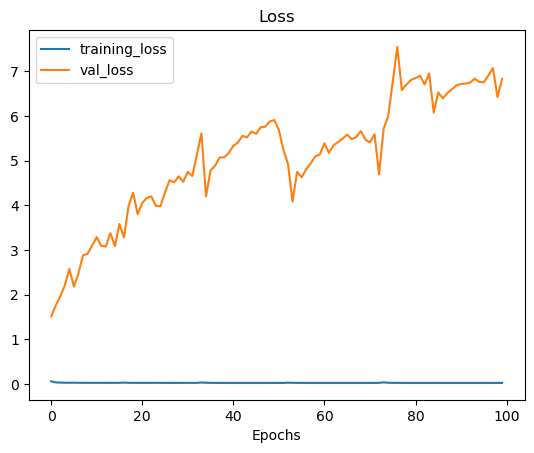

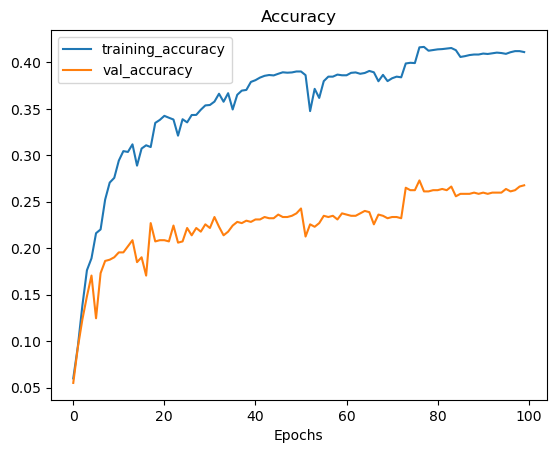

In [134]:
plot_loss_curves(model_5_history)

## Model 6: TensorFlow Hub Pretrained Feature Extractor

The model used is from this paper : [Universal Sentence Encoder](https://arxiv.org/abs/1803.11175)

In [135]:
import tensorflow_hub as hub

In [136]:
embed = hub.load("https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2")
embed_samples = embed(tf.constant([sample_sentence,
                                   "When you call the universal sentence encoder on a sentence, it turns it into numbers."]))

In [137]:
embed_samples[0][:50]

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-0.01157022,  0.02485909,  0.02878049, -0.01271502,  0.03971541,
        0.0882776 ,  0.02680985,  0.05589838, -0.01068732, -0.00597293,
        0.00639324, -0.01819521,  0.00030815,  0.0910589 ,  0.05874645,
       -0.03180628,  0.01512474, -0.05162928,  0.00991369, -0.06865346,
       -0.04209307,  0.0267898 ,  0.0301101 ,  0.00321071, -0.00337968,
       -0.04787361,  0.02266718, -0.00985926, -0.04063615, -0.01292094,
       -0.04666382,  0.05630298, -0.03949255,  0.00517684,  0.02495828,
       -0.0701444 ,  0.02871509,  0.04947679, -0.00633974, -0.08960192,
        0.02807122, -0.00808364, -0.01360597,  0.05998648, -0.10361788,
       -0.05195372,  0.00232956, -0.02332528, -0.03758107,  0.03327729],
      dtype=float32)>

In [138]:
embed_samples[0].shape

TensorShape([512])

In [139]:
sentence_encoder_layer = hub.KerasLayer("https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2",
                                         input_shape=[],
                                         dtype=tf.string,
                                         trainable=False,
                                         name="USE")

In [182]:
# build the model (sequential)
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
], name='model_6_USE')

In [183]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_30 (Dense)            (None, 128)               65664     
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dense_32 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,871,809
Trainable params: 73,985
Non-trainable params: 256,797,824
_________________________________________________________________


In [184]:
# compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=tf.keras.metrics.Accuracy())

In [185]:
# fit the model
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=100,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20241009-154703
Epoch 1/100
215/215 [==============================] - 5s 16ms/step - loss: 0.4686 - accuracy: 0.0000e+00 - val_loss: 0.4315 - val_accuracy: 0.0000e+00
Epoch 2/100
215/215 [==============================] - 3s 13ms/step - loss: 0.3938 - accuracy: 0.0000e+00 - val_loss: 0.4235 - val_accuracy: 0.0000e+00
Epoch 3/100
215/215 [==============================] - 3s 13ms/step - loss: 0.3700 - accuracy: 0.0000e+00 - val_loss: 0.4229 - val_accuracy: 0.0000e+00
Epoch 4/100
215/215 [==============================] - 3s 13ms/step - loss: 0.3384 - accuracy: 0.0000e+00 - val_loss: 0.4254 - val_accuracy: 0.0000e+00
Epoch 5/100
215/215 [==============================] - 3s 13ms/step - loss: 0.2991 - accuracy: 0.0000e+00 - val_loss: 0.4453 - val_accuracy: 0.0000e+00
Epoch 6/100
215/215 [==============================] - 3s 13ms/step - loss: 0.2606 - accuracy: 0.0000e+00 - val_loss: 0.4544 - val_accuracy: 0.0000e+00
Epoc

In [186]:
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 11ms/step


array([[4.0270344e-04],
       [9.9983054e-01],
       [1.0000000e+00],
       [2.5745208e-04],
       [4.1178027e-03],
       [1.0000000e+00],
       [9.9999845e-01],
       [9.9999893e-01],
       [1.0000000e+00],
       [8.3884963e-08]], dtype=float32)

In [187]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [281]:
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 0.7926509186351706,
 'precision': 0.7930624875358199,
 'recall': 0.7926509186351706,
 'f1': 0.7916058782200516}

In [282]:
baseline_results

{'accuracy': 0.7926509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [283]:
model_3_results

{'accuracy': 0.7493438320209974,
 'precision': 0.7489845053528059,
 'recall': 0.7493438320209974,
 'f1': 0.7483475363447356}

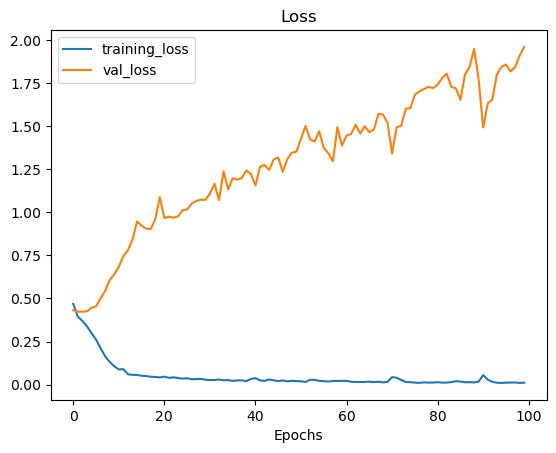

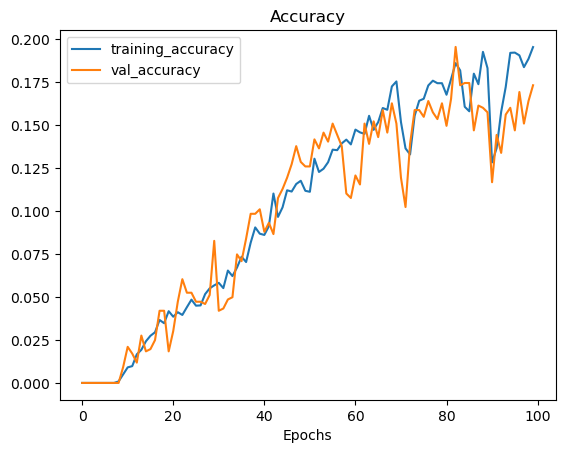

In [191]:
plot_loss_curves(model_6_history)

## Model 7: Same as model 6 with 10% of training data

In [194]:
train_10_percent = train_df_shuffled[['text', 'target']].sample(frac=0.1, random_state=42)
train_10_percent.head()

,text,target
4955,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0
584,FedEx no longer to transport bioterror germs i...,0
7411,Gunmen kill four in El Salvador bus attack: Su...,1
5950,@camilacabello97 Internally and externally scr...,1
5541,Radiation emergency #preparedness starts with ...,1


In [199]:
train_sentences_10_percent = train_10_percent['text'].to_list()
train_sentences_10_percent[:10]

['DFR EP016 Monthly Meltdown - On Dnbheaven 2015.08.06 http://t.co/EjKRf8N8A8 #Drum and Bass #heavy #nasty http://t.co/SPHWE6wFI5',
 'FedEx no longer to transport bioterror germs in wake of anthrax lab mishaps http://t.co/qZQc8WWwcN via @usatoday',
 'Gunmen kill four in El Salvador bus attack: Suspected Salvadoran gang members killed four people and wounded s... http://t.co/CNtwB6ScZj',
 '@camilacabello97 Internally and externally screaming',
 'Radiation emergency #preparedness starts with knowing to: get inside stay inside and stay tuned http://t.co/RFFPqBAz2F via @CDCgov',
 'Investigators rule catastrophic structural failure resulted in 2014 Virg.. Related Articles: http://t.co/Cy1LFeNyV8',
 'How the West was burned: Thousands of wildfires ablaze in #California alone http://t.co/iCSjGZ9tE1 #climate #energy http://t.co/9FxmN0l0Bd',
 "Map: Typhoon Soudelor's predicted path as it approaches Taiwan; expected to make landfall over southern China by S\x89Û_ http://t.co/JDVSGVhlIs",
 '\x89Û

In [200]:
train_labels_10_percent = train_10_percent['target'].to_list()
train_labels_10_percent[:10]

[0, 0, 1, 1, 1, 1, 1, 1, 1, 0]

In [201]:
# build the model (sequential)
model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
], name='model_7_USE')

In [203]:
model_7.summary()

Model: "model_7_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_33 (Dense)            (None, 128)               65664     
                                                                 
 dense_34 (Dense)            (None, 64)                8256      
                                                                 
 dense_35 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,871,809
Trainable params: 73,985
Non-trainable params: 256,797,824
_________________________________________________________________


In [205]:
# compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=tf.keras.metrics.Accuracy())

In [206]:
# fit the model
model_7_history = model_7.fit(train_sentences,
                              train_labels,
                              epochs=100,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder_10_percent")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent/20241009-162129
Epoch 1/100
215/215 [==============================] - 5s 18ms/step - loss: 0.4677 - accuracy: 0.0000e+00 - val_loss: 0.4366 - val_accuracy: 0.0000e+00
Epoch 2/100
215/215 [==============================] - 3s 16ms/step - loss: 0.3924 - accuracy: 0.0000e+00 - val_loss: 0.4267 - val_accuracy: 0.0000e+00
Epoch 3/100
215/215 [==============================] - 3s 14ms/step - loss: 0.3653 - accuracy: 0.0000e+00 - val_loss: 0.4197 - val_accuracy: 0.0000e+00
Epoch 4/100
215/215 [==============================] - 3s 14ms/step - loss: 0.3306 - accuracy: 0.0000e+00 - val_loss: 0.4427 - val_accuracy: 0.0000e+00
Epoch 5/100
215/215 [==============================] - 3s 16ms/step - loss: 0.2874 - accuracy: 0.0000e+00 - val_loss: 0.4745 - val_accuracy: 0.0000e+00
Epoch 6/100
215/215 [==============================] - 3s 15ms/step - loss: 0.2334 - accuracy: 0.0000e+00 - val_loss: 0.5043 - val_accuracy: 0.00

In [207]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 11ms/step


array([[2.3229092e-09],
       [8.8299650e-01],
       [1.0000000e+00],
       [4.5822585e-06],
       [2.5091688e-03],
       [9.9999958e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9998951e-01],
       [3.7670343e-08]], dtype=float32)

In [208]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [284]:
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accuracy': 0.7847769028871391,
 'precision': 0.7862392297712013,
 'recall': 0.7847769028871391,
 'f1': 0.7830611097687449}

In [285]:
baseline_results

{'accuracy': 0.7926509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [286]:
model_6_results

{'accuracy': 0.7926509186351706,
 'precision': 0.7930624875358199,
 'recall': 0.7926509186351706,
 'f1': 0.7916058782200516}

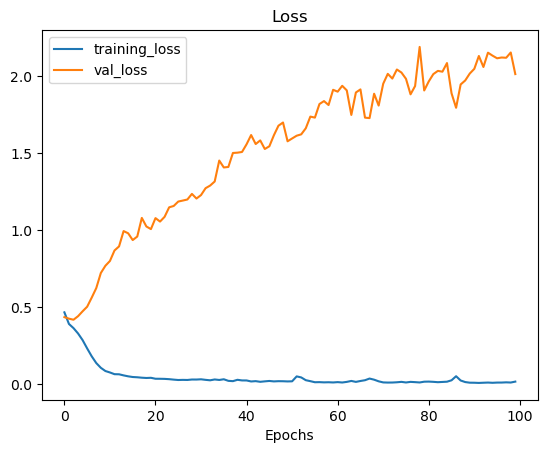

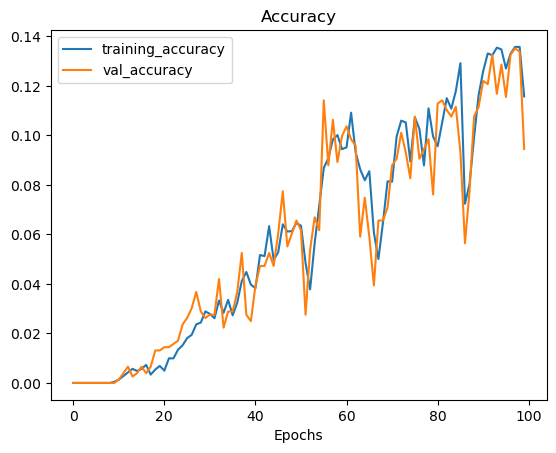

In [212]:
plot_loss_curves(model_7_history)

### Since data splitting in the above experiment was done through the shuffled DataFrame, there is a possibility of memory leakage from training data to validation data.

In [216]:
train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)

In [214]:
# Check length of 10 percent datasets
print(f"Total training examples: {len(train_sentences)}")
print(f"Length of 10% training examples: {len(train_sentences_10_percent)}")

Total training examples: 6851
Length of 10% training examples: 686


In [217]:
pd.Series(train_labels_10_percent).value_counts()

0    415
1    271
Name: count, dtype: int64

In [220]:
# Clone model_6 but reset weights
model_7 = tf.keras.models.clone_model(model_6)

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_30 (Dense)            (None, 128)               65664     
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dense_32 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,871,809
Trainable params: 73,985
Non-trainable params: 256,797,824
_________________________________________________________________


In [221]:
# Fit the model to 10% of the training data
model_7_history = model_7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "tf_hub_sentence_encoder_correct_split")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_correct_split/20241009-181519
Epoch 1/5
22/22 [==============================] - 4s 49ms/step - loss: 0.6501 - accuracy: 0.6122 - val_loss: 0.6311 - val_accuracy: 0.5722
Epoch 2/5
22/22 [==============================] - 0s 20ms/step - loss: 0.5323 - accuracy: 0.7755 - val_loss: 0.5397 - val_accuracy: 0.7717
Epoch 3/5
22/22 [==============================] - 0s 20ms/step - loss: 0.4222 - accuracy: 0.8499 - val_loss: 0.5128 - val_accuracy: 0.7782
Epoch 4/5
22/22 [==============================] - 0s 20ms/step - loss: 0.3331 - accuracy: 0.8761 - val_loss: 0.4770 - val_accuracy: 0.7979
Epoch 5/5
22/22 [==============================] - 0s 21ms/step - loss: 0.2722 - accuracy: 0.8994 - val_loss: 0.4954 - val_accuracy: 0.7848


In [223]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 0s 8ms/step


array([[0.11989555],
       [0.94024163],
       [0.9661415 ],
       [0.14263012],
       [0.49681976],
       [0.92827725],
       [0.9574384 ],
       [0.9220133 ],
       [0.94271135],
       [0.05083275]], dtype=float32)

In [224]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [287]:
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accuracy': 0.7847769028871391,
 'precision': 0.7862392297712013,
 'recall': 0.7847769028871391,
 'f1': 0.7830611097687449}

## Comparing the performance of each model

In [288]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"0_baseline": baseline_results,
                                  "1_simple_dense": model_1_results,
                                  "2_lstm": model_2_results,
                                  "3_gru": model_3_results,
                                  "4_bidirectional": model_4_results,
                                  "5_conv1d": model_5_results,
                                  "6_tf_hub_sentence_encoder": model_6_results,
                                  "7_tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
0_baseline,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.737533,0.737156,0.737533,0.737263
2_lstm,0.745407,0.744904,0.745407,0.744736
3_gru,0.749344,0.748985,0.749344,0.748348
4_bidirectional,0.740157,0.739866,0.740157,0.738848
5_conv1d,0.737533,0.737046,0.737533,0.737105
6_tf_hub_sentence_encoder,0.792651,0.793062,0.792651,0.791606
7_tf_hub_10_percent_data,0.784777,0.786239,0.784777,0.783061


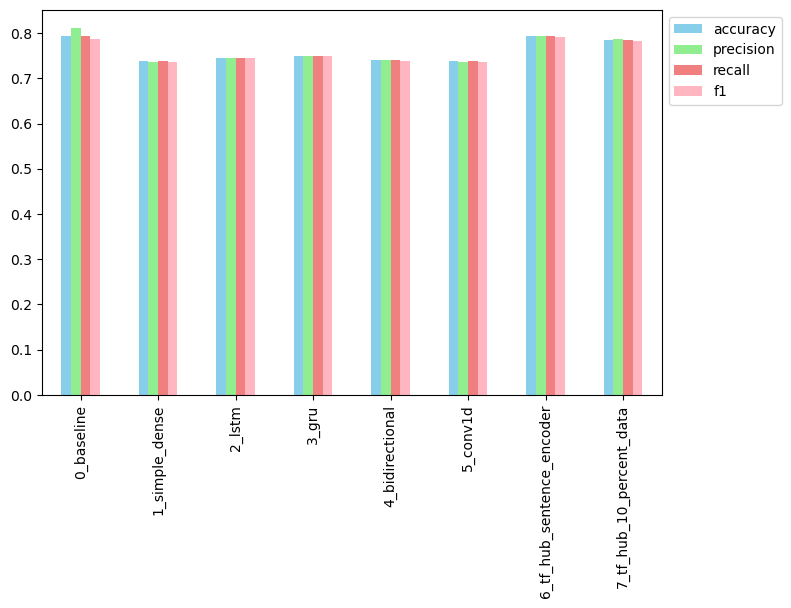

In [381]:
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightpink']
all_model_results.plot(kind="bar", figsize=(8, 5), color=colors).legend(bbox_to_anchor=(1.0, 1.0));

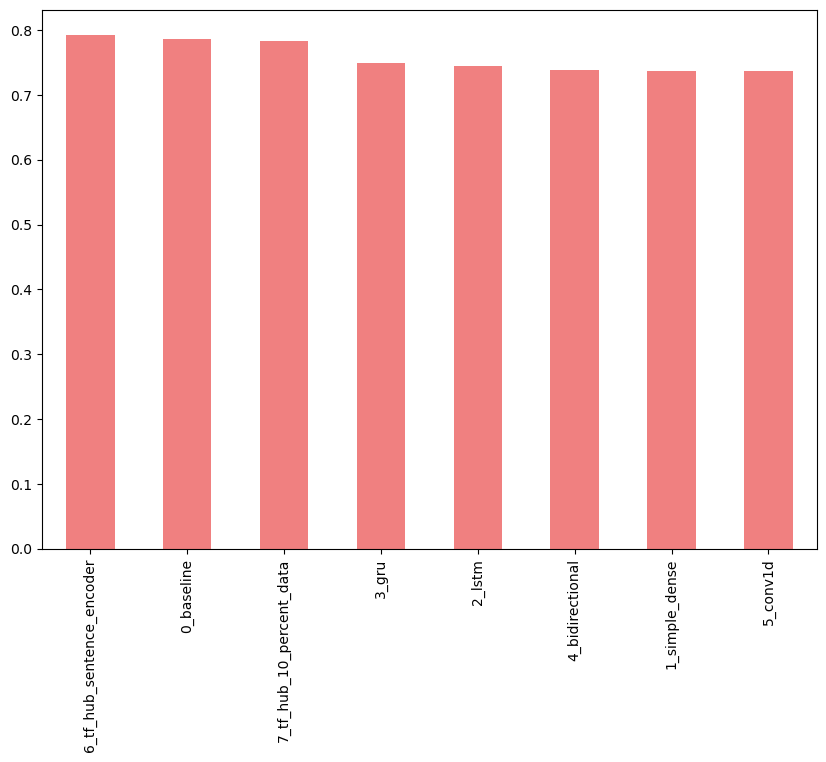

In [384]:
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7), color='lightcoral');

## Saving and loading a trained model

In [299]:
model_6_results, model_7_results

({'accuracy': 0.7926509186351706,
  'precision': 0.7930624875358199,
  'recall': 0.7926509186351706,
  'f1': 0.7916058782200516},
 {'accuracy': 0.7847769028871391,
  'precision': 0.7862392297712013,
  'recall': 0.7847769028871391,
  'f1': 0.7830611097687449})

In [300]:
model_6.save("model_6.h5")

In [301]:
loaded_model_6 = tf.keras.models.load_model("model_6.h5", 
                                            custom_objects={"KerasLayer": hub.KerasLayer})

In [303]:
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 11ms/step - loss: 1.9595 - accuracy: 0.1732


[1.9594639539718628, 0.17322835326194763]

### Finding the most wrong examples

In [305]:
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_preds,
                       "pred_prob": tf.squeeze(model_6_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.000403
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.999831
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,1.000000
3,@camilacabello97 Internally and externally scr...,1,0.0,0.000257
4,Radiation emergency #preparedness starts with ...,1,0.0,0.004118


In [306]:
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
692,New Giant Flames (Giant Manly Brown) info/orde...,0,1.0,1.000000
628,@noah_anyname That's where the concentration c...,0,1.0,1.000000
237,Came across this fire video not mine..enjoy..B...,0,1.0,1.000000
359,the windstorm blew thru my open window and now...,0,1.0,1.000000
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,1.000000
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,1.000000
712,WPRI 12 Eyewitness News Rhode Island set to mo...,0,1.0,1.000000
645,Love is the weapon for this wounded generation...,0,1.0,0.999999
381,Deaths 3 http://t.co/nApviyGKYK,0,1.0,0.999999
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.999999


In [307]:
# Check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples(): # loop through the top 10 rows (change the index to view different rows)
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0, Pred: 1, Prob: 1.0
Text:
New Giant Flames (Giant Manly Brown) info/order sms:087809233445 pin:2327564d http://t.co/T1mBw0ia3o  http://t.co/CLfa0PY5Lm

----

Target: 0, Pred: 1, Prob: 1.0
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1, Prob: 1.0
Text:
Came across this fire video not mine..enjoy..Babes way of saying hi to me while he's in the fire truck??
#fireman #Û_ http://t.co/V5gTUnwohy

----

Target: 0, Pred: 1, Prob: 1.0
Text:
the windstorm blew thru my open window and now my bong is in pieces just another example of nature's indifference to human suffering

----

Target: 0, Pred: 1, Prob: 0.9999999403953552
Text:
[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES WITH MAGNE-TRACTION INSTRUCTIONS http://t.co/xEZBs3sq0y http://t.co/C2x0QoKGlY

----

Target: 0, Pred: 1, Prob: 0.9999998211860657
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character re

In [308]:
# Check the most wrong false negatives (model predicted 0 when should've predict 1)
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, prob = row
  print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1, Pred: 0, Prob: 1.743315353186503e-10
Text:
I get to smoke my shit in peace

----

Target: 1, Pred: 0, Prob: 1.6666208690896411e-10
Text:
World War II book LIGHTNING JOE An Autobiography by General J. Lawton Collins http://t.co/R4khEH7iaf http://t.co/qSZgJfUutu

----

Target: 1, Pred: 0, Prob: 9.240189169368307e-11
Text:
Just came back from camping and returned with a new song which gets recorded tomorrow. Can't wait! #Desolation #TheConspiracyTheory #NewEP

----

Target: 1, Pred: 0, Prob: 5.73210263976609e-11
Text:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0, Prob: 1.37701985231109e-11
Text:
when you don't know which way an ambulance is coming from &lt;&lt;

----

Target: 1, Pred: 0, Prob: 8.831739159442797e-12
Text:
Perspectives on the Grateful Dead: Critical Writings (Contributions to the Study http://t.co/fmu0fnuMxf http://t.co/AgGRyhVXKr

----

Target: 1, Pred: 0, Prob: 2.855267021081853e-

### Making predictions on the test dataset


In [311]:
custom_tweet = "take a bow for his marvellous performance at shibuya"
custom_tweet

'take a bow for his marvellous performance at shibuya'

In [312]:
def predict_on_sentence(model, sentence):
  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"Pred: {pred_label}", "(real disaster)" if pred_label > 0 else "(not real disaster)", f"Prob: {pred_prob[0][0]}")
  print(f"Text:\n{sentence}")

In [314]:
# make a prediction on tweet from the wild
predict_on_sentence(model=model_6,
                    sentence=custom_tweet)

1/1 [==============================] - 0s 468ms/step
Pred: 0.0 (not real disaster) Prob: 0.0005938426475040615
Text:
take a bow for his marvellous performance at shibuya


In [325]:
import gradio as gr

model = loaded_model_6

def predict_on_sentence(sentence):
  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  return "real disaster" if pred_label > 0 else "not real disaster"

demo = gr.Interface(
    fn=predict_on_sentence,
    inputs=["text"],
    outputs=["text"],
)

demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7869
* Running on public URL: https://49e00e7c13392c9c7b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 95ms/step


## The speed/score tradeoff


In [326]:
# Calculate the time of predictions
import time
def pred_timer(model, samples):
  start_time = time.perf_counter()
  model.predict(samples)
  end_time = time.perf_counter()
  total_time = end_time-start_time
  time_per_pred = total_time/len(val_sentences)
  return total_time, time_per_pred

In [327]:
# Calculate TF Hub Sentence Encoder prediction times
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6, val_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 1s 44ms/step


(1.393376799998805, 0.0018285784776887204)

In [328]:
# Calculate Naive Bayes prediction times
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.07513839999955962, 9.860682414640371e-05)

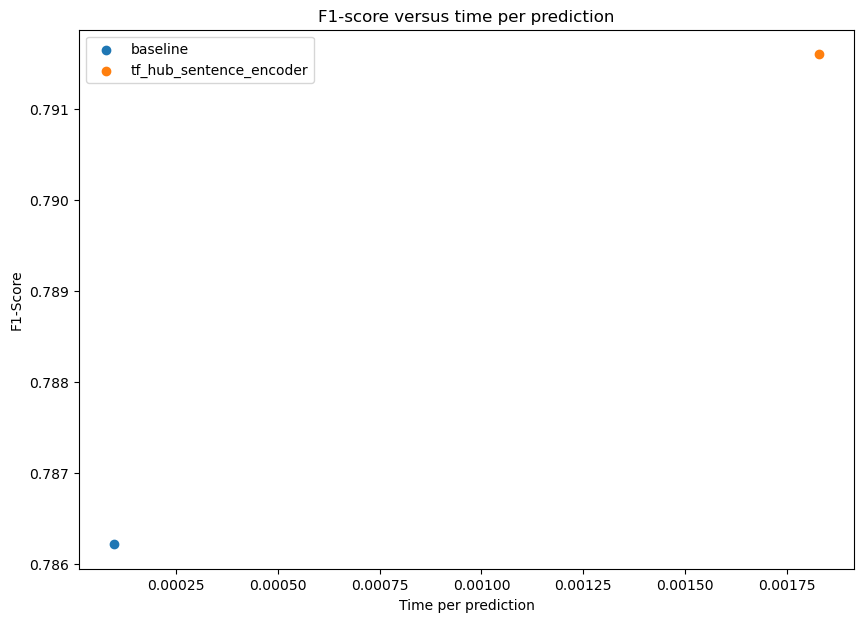

In [329]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");